# Data Analysis


- This file contain the cleaning and analysis of the dataset 
- From this file , I am going to save cleaned CSV file that contain the cleaned dataset for the project

## Importing Libraries

In [3]:
import pandas as pd 
import numpy as np
import os
import contractions
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [4]:
file_path = r"C:\Users\ayush\jupyter Notebook\NMT\data\data-Neural-Translation.txt"

## Opening the file and converting to DataFrame 

In [5]:
data_file_path = os.path.join(file_path)

In [6]:
dataframe = pd.read_csv(data_file_path, encoding='utf-8', sep='\t',  names=['English', 'French', 'Source'])
dataframe.sample(5)

,English,French,Source
223372,The doctor informed his patient of the name of...,Le docteur a informé son patient du nom de sa ...,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
23041,They were killed.,Ils ont été tués.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
151595,I only have one thing left to do.,Il ne me reste qu'une chose à faire.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...
221517,Which writing system is the most difficult in ...,Quel est le système d'écriture le plus diffici...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
124637,You can't keep this a secret.,Tu ne peux pas le garder secret.,CC-BY 2.0 (France) Attribution: tatoeba.org #1...


In [7]:
## dropping the Source column from the dataframe
dataframe.drop(["Source"] , axis = 1 , inplace = True)

In [8]:
dataframe.head()

,English,French
0,Go.,Va !
1,Go.,Marche.
2,Go.,En route !
3,Go.,Bouge !
4,Hi.,Salut !


## Getting the info of Dataframe and checking if there is any null values

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229803 entries, 0 to 229802
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  229803 non-null  object
 1   French   229803 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [10]:
dataframe.isnull().sum()

English    0
French     0
dtype: int64

## Data cleaning 

### Remove extra spaces 

In [11]:
## let's first remove the whitespaces from the data
dataframe["English"] = dataframe.English.apply(lambda x: " ".join(x.split()))
dataframe["French"] = dataframe.French.apply(lambda x: " ".join(x.split()))

### Lower case

In [12]:
dataframe["English"] = dataframe.English.apply(lambda x : x.lower())
dataframe["French"] = dataframe.French.apply(lambda x : x.lower())

### Expantion of the text

#### Note :- can't -> can not 

- So , I am going to expand such words using contractions

In [13]:
def expand_words(text) :
## expandind are sentences ##
    return contractions.fix(text)

In [14]:
dataframe["English"] = dataframe.English.apply(expand_words)
dataframe["French"] = dataframe.French.apply(expand_words)

###### Example :

In [15]:
sentence = "I won't repeat my mistake"
expanded_sentence = expand_words(sentence)
## print
print("Sentence :" , sentence)
print("Changed or expanded sentence :" , expanded_sentence)

Sentence : I won't repeat my mistake
Changed or expanded sentence : I will not repeat my mistake


### Removing Punctuation

- In this , I am going to remove punctuations from the sentences as it will increase computational power .

In [16]:
translator = translator= str.maketrans('','', string.punctuation)

In [17]:
dataframe.English= dataframe.English.apply(lambda x: x.translate(translator))
dataframe.French = dataframe.French.apply(lambda x: x.translate(translator))

In [18]:
dataframe.head()

,English,French
0,go,va
1,go,marche
2,go,en route
3,go,bouge
4,hi,salut


### Removing Numbers 

- It can be possible that the sentence can have numbers in it . So , I am going to remove them just in case if we have them .

In [19]:
dataframe["English"] = dataframe.English.apply(lambda x: re.sub(r'[\d]+', '', x))
dataframe["French"] = dataframe.French.apply(lambda x: re.sub(r'[\d]+', '', x))

### Creating column for counting words as well as characters

In [20]:
dataframe["Eng_word_count"] = dataframe.English.apply(lambda x : len(x.split()))
dataframe["Fr_word_count"] = dataframe.French.apply(lambda x : len(x.split()))

In [21]:
dataframe["Eng_char_count"] = dataframe.English.apply(lambda x : len("".join(x.split())))
dataframe["Fre_char_count"] = dataframe.French.apply(lambda x : len("".join(x.split())))

In [22]:
dataframe.head()

,English,French,Eng_word_count,Fr_word_count,Eng_char_count,Fre_char_count
0,go,va,1,1,2,2
1,go,marche,1,1,2,6
2,go,en route,1,2,2,7
3,go,bouge,1,1,2,5
4,hi,salut,1,1,2,5


## Plotting of End_word_count

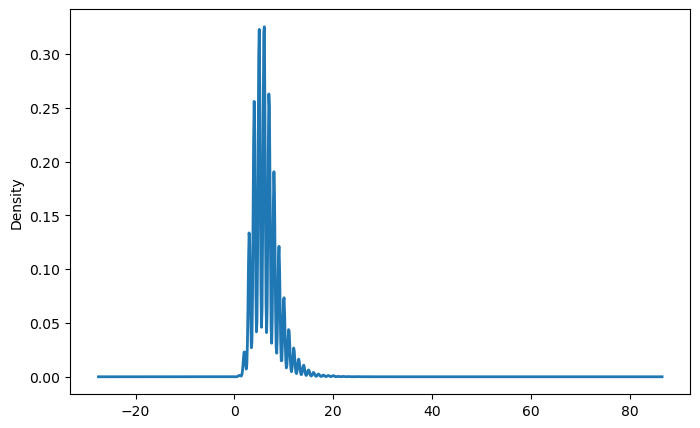

In [23]:
s = pd.Series(dataframe.Eng_word_count)
ax = s.plot.kde(figsize=(8, 5),  # Figure size
    linewidth=2,    # Line width of the KDE plot
    label='KDE Plot')

In [24]:
max(dataframe.Eng_word_count)

58

## Plotting of Fr_word_count

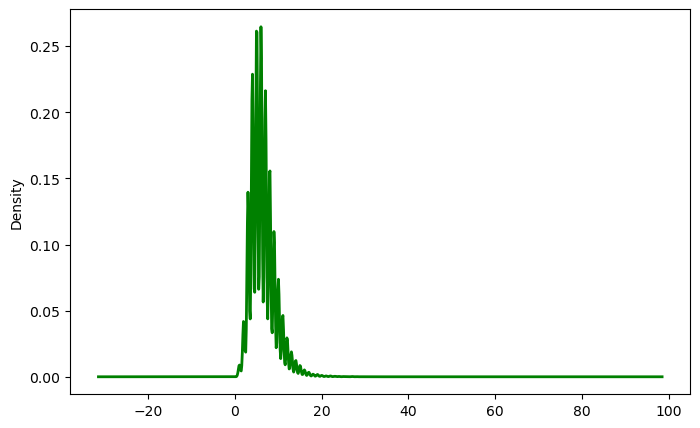

In [26]:
s = pd.Series(dataframe.Fr_word_count)
ax = s.plot.kde(figsize=(8, 5),  # Figure size
    color = "green",
    linewidth=2,    # Line width of the KDE plot
    label='KDE Plot')

In [27]:
max(dataframe.Fr_word_count)

66

## Plotting of Eng_char_count

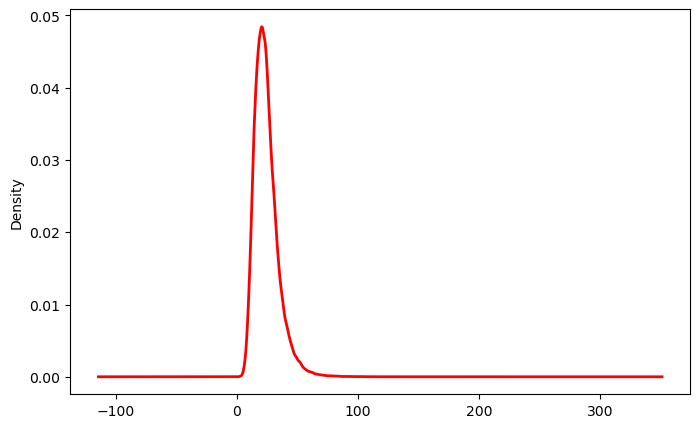

In [28]:
s = pd.Series(dataframe.Eng_char_count)
ax = s.plot.kde(figsize=(8, 5),  # Figure size
    color = "red",
    linewidth=2,    # Line width of the KDE plot
    label='KDE Plot')

## Plotting of Fre_char_count

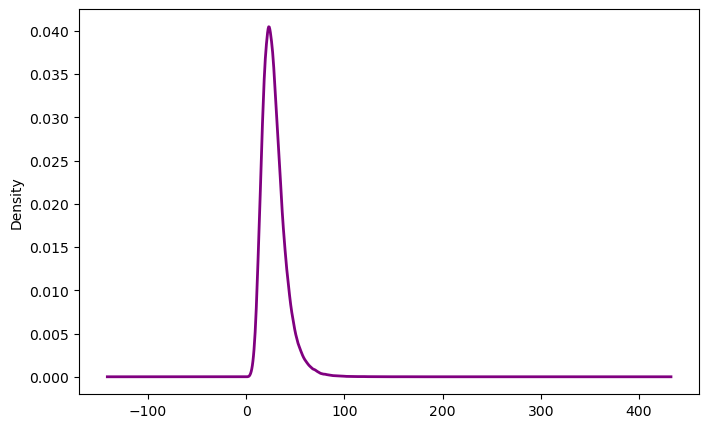

In [29]:
s = pd.Series(dataframe.Fre_char_count)
ax = s.plot.kde(figsize=(8, 5),  # Figure size
    color = "purple",
    linewidth=2,    # Line width of the KDE plot
    label='KDE Plot')

In [30]:
def plot_word_cloud(data):
    words=""
    for sent in data:
        sent= str(sent)
        sent=sent.lower()
        tokens= sent.split()
        words +=" ".join(tokens)+" "
    plt.figure(figsize=(15,12))
    wordcloud= WordCloud(width=800,height=800, background_color='aqua').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

## Plot word_cloud for English

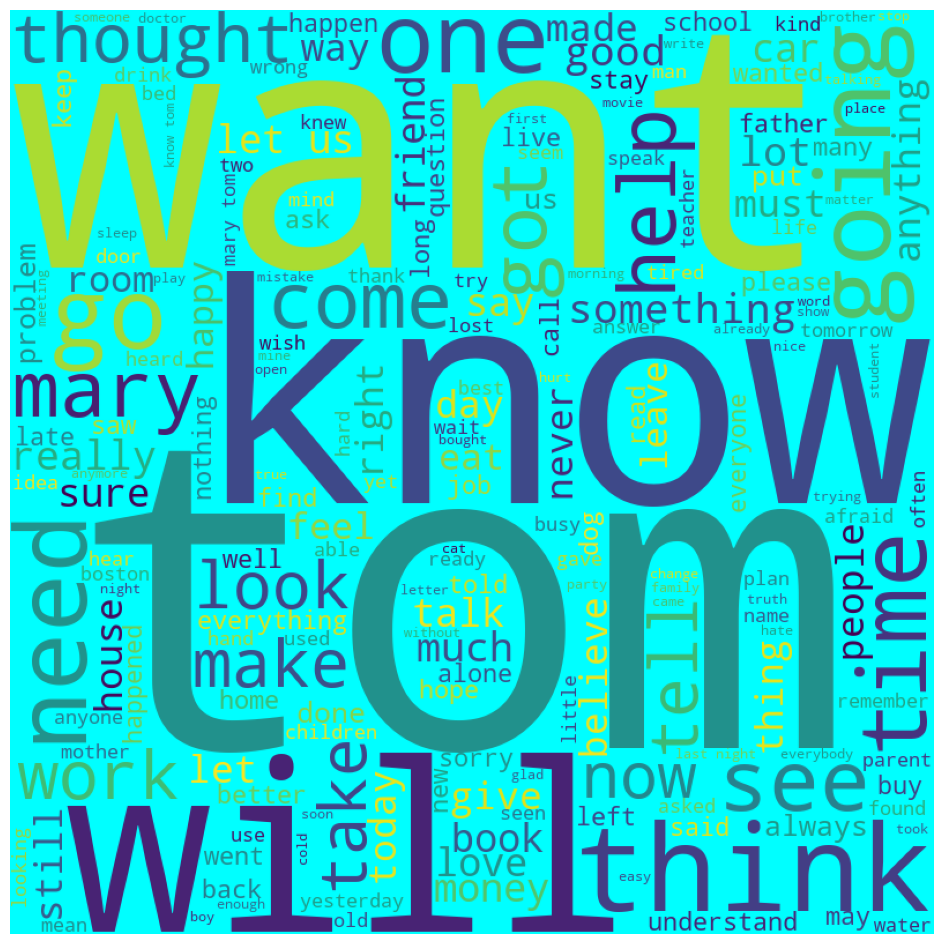

In [31]:
plot_word_cloud(dataframe.English)

## Plot word_cloud  for French

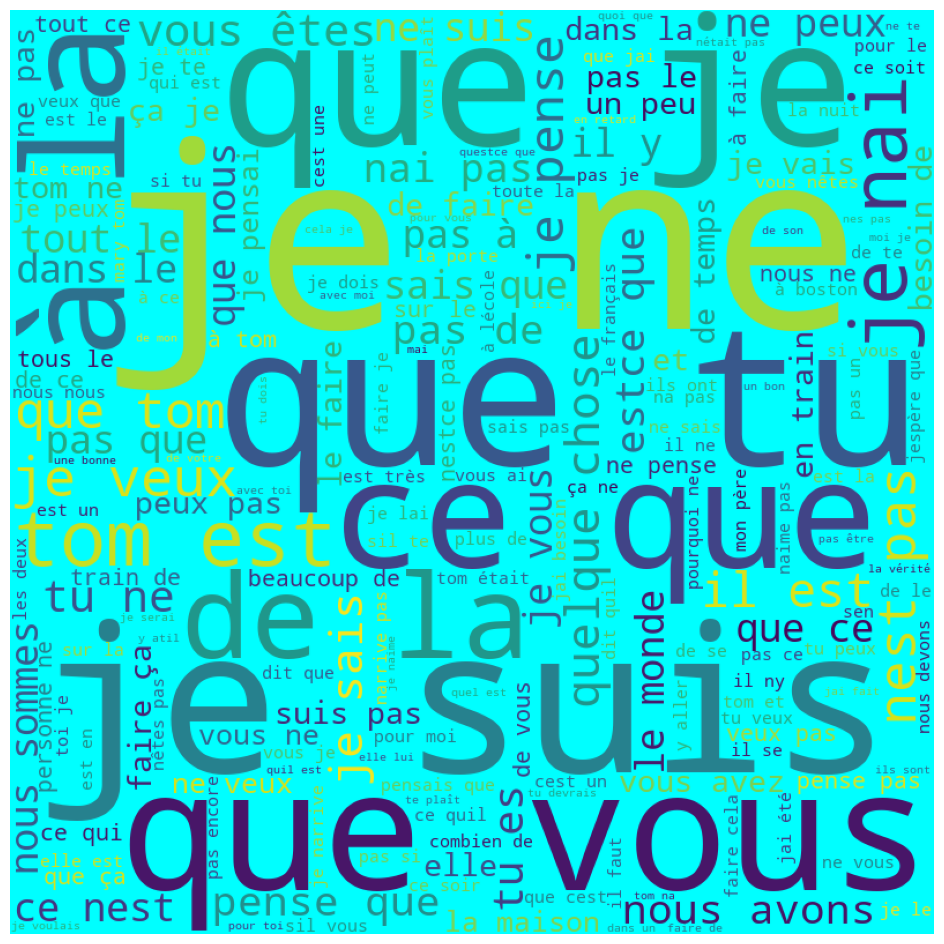

In [32]:
plot_word_cloud(dataframe.French)

## Preparation of data for Neural Machine Translation

- Source : French
- Target : English

### Adding start and end tokens at the end of target sequence

- For Example : "hy" -> <'start'> hy <'end'>

In [33]:
def add_tokens(sentence) :
    return "<start>" + sentence + "<end>"

In [34]:
dataframe.English = dataframe.English.apply(add_tokens)

In [35]:
dataframe.sample(4)

,English,French,Eng_word_count,Fr_word_count,Eng_char_count,Fre_char_count
157191,<start>how did you get so good at french<end>,comment êtesvous devenue si bonne en français,8,7,26,39
212731,<start>i hear a lot of girls wear bikinis at t...,jentends dire que beaucoup de filles portent d...,11,12,38,61
78262,<start>we depend on each other<end>,nous sommes interdépendantes,5,3,19,26
117394,<start>he asked her where she lived<end>,il lui a demandé où elle vivait,6,7,23,25


## Splitting the data into train and test 

### Saving complete cleaned dataset

In [ ]:
dataframe.to_csv(r'C:\Users\ayush\jupyter Notebook\NMT\data\cleaned_data.csv' , index = False)

## Spitting data

In [36]:
### splitting the data
X = dataframe.French
Y = dataframe.English

In [37]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 42)

## Saving training data

In [38]:
## create dataframe for training data
training_data = pd.DataFrame()
training_data["Source"] = X_train
training_data["Target"] = Y_train
## saving into CSV
training_data.to_csv(r'C:\Users\ayush\jupyter Notebook\NMT\data\Training_data.csv' , index = False)

## Saving Testing_data

In [37]:
## create dataframe for testing data
Testing_data = pd.DataFrame()
Testing_data["Source"] = X_test
Testing_data["Target"] = Y_test
## saving into CSV
Testing_data.to_csv(r'C:\Users\ayush\jupyter Notebook\NMT\data\Testing_data.csv')